In [1]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib
%pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR

Note: you may need to restart the kernel to use updated packages.



In [3]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv("data/train.csv")
df_train = pd.DataFrame()
df_train['Date'] = pd.to_datetime(df['dt'], format="%d.%m.%Y")
df_train['Price'] = df['Цена на арматуру']
df = pd.read_csv("data/test.csv")
df_test = pd.DataFrame()
df_test['Date'] = pd.to_datetime(df['dt'], format="%Y.%m.%d")
df_test['Price'] = df['Цена на арматуру']
df = pd.concat((df_train, df_test)).reset_index(drop=True)

In [5]:
df = pd.read_csv("df_merged_cleaned.csv")
df['Date'] = pd.to_datetime(df['dt'])
df['Price'] = df['Цена на арматуру']
df = df.drop(columns=['Цена на арматуру','dt'])

In [6]:
df.head(10)

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",Date,Price
0,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-01-06,23500.0
1,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-01-19,32000.0
2,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-01-26,30700.0
3,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-02-02,30300.0
4,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-02-09,24500.0
5,3850.0,206.0,12271.0,10432.0,12852.0,63.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-02-16,30100.0
6,3850.0,207.0,12645.0,11981.0,13034.0,64.0,285.5,3700.0,72.0,215.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-02-23,29400.0
7,3850.0,214.0,12696.0,11912.0,12910.0,63.0,285.5,3700.0,72.0,224.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-03-02,25000.0
8,4400.0,229.0,12883.0,11893.0,12812.0,58.0,285.5,4050.0,67.0,231.0,...,4164.0,3525.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-03-16,28700.0
9,4400.0,230.0,12753.0,11945.0,12694.0,56.0,285.5,4050.0,65.0,230.0,...,4164.0,3525.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-03-23,27800.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 40 columns):
 #   Column                                                                                            Non-Null Count  Dtype         
---  ------                                                                                            --------------  -----         
 0   Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС                                  368 non-null    float64       
 1   Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                                                          368 non-null    float64       
 2   Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                      368 non-null    float64       
 3   Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                                                  368 non-null    float64       
 4   Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС                                    

In [8]:
df.describe()

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",Date,Price
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368,368.000000
mean,8540.217391,298.355978,18076.451087,16299.084239,17711.076087,92.562500,393.001359,7098.879076,112.764946,304.173913,...,8067.209239,6506.521739,409.736413,386.906250,6177.877717,4486.625000,2515.872283,43.980978,2019-02-14 09:46:57.391304448,39610.842391
min,3850.000000,153.000000,9103.000000,8016.000000,9052.000000,39.000000,285.500000,3700.000000,48.500000,158.000000,...,3890.000000,3300.000000,290.000000,280.000000,2456.000000,1751.000000,1049.000000,21.000000,2015-01-06 00:00:00,21000.000000
25%,5050.000000,239.750000,13498.000000,11774.000000,13126.500000,63.000000,285.500000,4400.000000,84.500000,245.000000,...,4838.000000,4100.000000,312.000000,297.500000,3741.000000,2696.000000,1482.250000,27.500000,2017-01-28 06:00:00,31800.000000
50%,7750.000000,276.500000,16694.500000,15580.500000,16680.000000,83.500000,360.000000,6450.000000,106.500000,285.500000,...,7670.000000,5850.000000,366.250000,350.000000,5022.000000,3889.000000,2462.000000,43.000000,2019-02-07 12:00:00,36850.000000
75%,9950.000000,335.000000,21036.000000,19036.500000,20085.250000,113.250000,447.500000,7950.000000,124.625000,343.500000,...,9097.000000,6725.000000,465.000000,400.625000,7685.000000,5175.000000,3119.000000,55.000000,2021-03-04 12:00:00,43025.000000
max,22750.000000,614.000000,33913.000000,31137.000000,33041.000000,225.000000,855.000000,19000.000000,259.000000,619.000000,...,21370.000000,19600.000000,1000.000000,804.000000,17343.000000,12649.000000,6679.000000,97.000000,2023-03-13 00:00:00,79000.000000
std,4372.574386,85.480026,6055.240520,5625.664417,5814.745750,38.320624,114.117957,3582.743945,44.140981,86.638949,...,3904.442013,3413.651657,125.357852,105.564249,3420.318800,2527.000668,1148.849145,18.167017,NaN,12975.073130


In [16]:
# создаем колонку с месяцем
df['Month'] = df['Date'].dt.month
# создаем колонку с годом
df['Year'] = df['Date'].dt.year
# создаем колонку с днем недели на русском
df['DayOfWeek'] = df['Date'].dt.day_name(locale='ru_RU')


In [17]:
# словарь с сезонами
seasons = {
    1: 0, 2: 0, 3: 1,
    4: 1, 5: 1, 6: 2,
    7: 2, 8: 2, 9: 3,
    10: 3, 11: 3, 12: 0
}

# создаем колонку с сезонами (весна, зима и тд)
df['Season'] = df['Date'].dt.month.map(seasons)

In [9]:
df

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",Date,Price
0,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-01-06,23500.0
1,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-01-19,32000.0
2,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-01-26,30700.0
3,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-02-02,30300.0
4,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,2015-02-09,24500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,9500.0,399.0,25741.0,23774.0,24100.0,124.0,505.0,7500.0,136.5,409.0,...,9010.0,7500.0,516.0,457.5,5043.0,4382.0,2577.0,50.0,2023-02-13,44500.0
364,9500.0,390.0,25837.0,24060.0,24184.0,124.0,500.0,7500.0,137.5,400.0,...,9010.0,7500.0,525.0,465.0,5043.0,4382.0,2577.0,50.0,2023-02-20,46000.0
365,9500.0,411.0,25814.0,24275.0,24047.0,130.0,502.5,7500.0,143.0,422.0,...,9010.0,7500.0,532.5,455.0,5547.0,4898.0,2921.0,56.0,2023-02-27,49200.0
366,10000.0,422.0,25821.0,25347.0,24055.0,126.0,500.0,7500.0,139.0,430.0,...,9090.0,7500.0,550.0,467.5,5547.0,4898.0,2921.0,56.0,2023-03-06,53700.0


In [10]:
df.dtypes

Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС                                           float64
Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т                                                                   float64
Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС                                                               float64
Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС                                                           float64
Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС                                                         float64
ЖРС_Китай Iron ore fines Fe 62%, CFR                                                                       float64
Чугун_CFR Италия, $/т                                                                                      float64
Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС                                           float64
ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т 

Создаем `y` (`features`)

In [11]:
# Исключаем колонку 'Price' и категориальные колонки
y = df.drop(columns=['Date'] + list(df.select_dtypes(include=['object', 'category']).columns))

# Сдвигаем данные на один шаг вперед
y = y.iloc[1:, :]

In [21]:
y

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Лом_HMS 1/2 80:20, CFR Турция, $/т","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",Price
1,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,32000.0
2,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,30700.0
3,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,30300.0
4,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,24500.0
5,3850.0,206.0,12271.0,10432.0,12852.0,63.0,285.5,3700.0,70.0,221.0,...,243.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,30100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,9500.0,399.0,25741.0,23774.0,24100.0,124.0,505.0,7500.0,136.5,409.0,...,428.0,9010.0,7500.0,516.0,457.5,5043.0,4382.0,2577.0,50.0,44500.0
364,9500.0,390.0,25837.0,24060.0,24184.0,124.0,500.0,7500.0,137.5,400.0,...,419.0,9010.0,7500.0,525.0,465.0,5043.0,4382.0,2577.0,50.0,46000.0
365,9500.0,411.0,25814.0,24275.0,24047.0,130.0,502.5,7500.0,143.0,422.0,...,440.0,9010.0,7500.0,532.5,455.0,5547.0,4898.0,2921.0,56.0,49200.0
366,10000.0,422.0,25821.0,25347.0,24055.0,126.0,500.0,7500.0,139.0,430.0,...,452.0,9090.0,7500.0,550.0,467.5,5547.0,4898.0,2921.0,56.0,53700.0


Создаем `X` (`target`)

In [12]:
X = df['Price'].values[1:]
X

array([32000., 30700., 30300., 24500., 30100., 29400., 25000., 28700.,
       27800., 27200., 25700., 24800., 24700., 24000., 24000., 23700.,
       26600., 24400., 25000., 25300., 23900., 25500., 25400., 25200.,
       23800., 24400., 24100., 24100., 24500., 24200., 24200., 24000.,
       24700., 23800., 24200., 23900., 23950., 23750., 23100., 23800.,
       22000., 21700., 21300., 31000., 21200., 21000., 40300., 21200.,
       21800., 22450., 33300., 23800., 25500., 26700., 29900., 31500.,
       31900., 28500., 43350., 42950., 42000., 38300., 37500., 36800.,
       35400., 30200., 32500., 32000., 21000., 30200., 29200., 28850.,
       28700., 43500., 32000., 32500., 34300., 33700., 32200., 30400.,
       33400., 29800., 33500., 33500., 30000., 33500., 33000., 32500.,
       26500., 33750., 33750., 33000., 37500., 32000., 31300., 30300.,
       26650., 30700., 30600., 30400., 38600., 31500., 28200., 27500.,
       26150., 26300., 26200., 26150., 30000., 26350., 26550., 30900.,
      

In [13]:
y['Price_target'] = X

In [24]:
y

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС",Price,Price_target
1,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,32000.0,32000.0
2,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,30700.0,30700.0
3,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,30300.0,30300.0
4,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,24500.0,24500.0
5,3850.0,206.0,12271.0,10432.0,12852.0,63.0,285.5,3700.0,70.0,221.0,...,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0,30100.0,30100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,9500.0,399.0,25741.0,23774.0,24100.0,124.0,505.0,7500.0,136.5,409.0,...,9010.0,7500.0,516.0,457.5,5043.0,4382.0,2577.0,50.0,44500.0,44500.0
364,9500.0,390.0,25837.0,24060.0,24184.0,124.0,500.0,7500.0,137.5,400.0,...,9010.0,7500.0,525.0,465.0,5043.0,4382.0,2577.0,50.0,46000.0,46000.0
365,9500.0,411.0,25814.0,24275.0,24047.0,130.0,502.5,7500.0,143.0,422.0,...,9010.0,7500.0,532.5,455.0,5547.0,4898.0,2921.0,56.0,49200.0,49200.0
366,10000.0,422.0,25821.0,25347.0,24055.0,126.0,500.0,7500.0,139.0,430.0,...,9090.0,7500.0,550.0,467.5,5547.0,4898.0,2921.0,56.0,53700.0,53700.0


In [14]:
y = y.drop(columns=['Price', 'Price_target'])
y

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Концентрат коксующегося угля_Россия марка Ж FCA руб./т, без НДС","Лом_HMS 1/2 80:20, CFR Турция, $/т","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС"
1,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,4700.0,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0
2,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,4700.0,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0
3,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,4700.0,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0
4,3850.0,228.0,12344.0,10009.0,12728.0,62.0,285.5,3700.0,70.0,221.0,...,4700.0,246.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0
5,3850.0,206.0,12271.0,10432.0,12852.0,63.0,285.5,3700.0,70.0,221.0,...,4700.0,243.0,3890.0,3350.0,312.0,297.5,3540.0,2097.0,1261.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,9500.0,399.0,25741.0,23774.0,24100.0,124.0,505.0,7500.0,136.5,409.0,...,10200.0,428.0,9010.0,7500.0,516.0,457.5,5043.0,4382.0,2577.0,50.0
364,9500.0,390.0,25837.0,24060.0,24184.0,124.0,500.0,7500.0,137.5,400.0,...,10200.0,419.0,9010.0,7500.0,525.0,465.0,5043.0,4382.0,2577.0,50.0
365,9500.0,411.0,25814.0,24275.0,24047.0,130.0,502.5,7500.0,143.0,422.0,...,10200.0,440.0,9010.0,7500.0,532.5,455.0,5547.0,4898.0,2921.0,56.0
366,10000.0,422.0,25821.0,25347.0,24055.0,126.0,500.0,7500.0,139.0,430.0,...,10200.0,452.0,9090.0,7500.0,550.0,467.5,5547.0,4898.0,2921.0,56.0


In [ ]:
# y = df.drop(columns=['Price']).iloc[:-1, :]
# X = df['Price'].values[1:]
# y['Price_target'] = X
# y['Price_source'] = df['Price'].values[:-1]
# price_diff = y['Price_source'] - y['Price_target']
# X = y['Price_target']
# y = y.drop(columns=['Price_target', 'Date'])
# y = y.drop([0])
# y['Price_Diff'] = price_diff.values[:-1]
# y

,Month,Year,DayOfWeek,Season,Price_source,Price_Diff
1,1,2015,Понедельник,0,32500,400
2,1,2015,Понедельник,0,32000,500
3,1,2015,Понедельник,0,30700,1300
4,2,2015,Понедельник,0,30300,400
5,2,2015,Понедельник,0,30300,0
...,...,...,...,...,...,...
422,2,2023,Понедельник,0,44500,-1700
423,2,2023,Понедельник,0,44500,0
424,2,2023,Понедельник,0,46000,-1500
425,2,2023,Понедельник,0,49200,-3200


In [26]:
pd.DataFrame(X).describe()

,0
count,367.000000
mean,39654.741144
std,12965.392075
min,21000.000000
25%,31850.000000
50%,36900.000000
75%,43050.000000
max,79000.000000


In [27]:
y.describe()

,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т","Лом_HMS 1/2 80:20, FOB США Восток, $/т",...,"Концентрат коксующегося угля_Россия марка Ж FCA руб./т, без НДС","Лом_HMS 1/2 80:20, CFR Турция, $/т","Концентрат коксующегося угля_Средняя шихта Россия FCA руб./т, без НДС","Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС"
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,8552.997275,298.547684,18092.070845,16316.223433,17724.653951,92.645777,393.294278,7108.140327,112.881471,304.400545,...,9184.230245,325.866485,8078.591281,6515.122616,410.002725,387.149864,6185.065395,4493.136240,2519.291553,44.038147
std,4371.656163,85.517469,6056.078693,5623.715344,5816.839296,38.339580,114.135132,3583.221383,44.144528,86.647930,...,4510.658242,93.513747,3903.654000,3414.316809,125.424705,105.604728,3422.203999,2527.357372,1148.540954,18.158641
min,3850.000000,153.000000,9103.000000,8016.000000,9052.000000,39.000000,285.500000,3700.000000,48.500000,158.000000,...,4400.000000,170.000000,3890.000000,3300.000000,290.000000,280.000000,2456.000000,1751.000000,1049.000000,21.000000
25%,5100.000000,240.000000,13521.500000,11789.000000,13152.500000,63.500000,285.500000,4400.000000,85.500000,245.500000,...,5475.000000,262.500000,4881.500000,4100.000000,312.000000,297.500000,3741.000000,2696.000000,1554.000000,29.000000
50%,7750.000000,277.000000,16696.000000,15583.000000,16684.000000,84.000000,360.000000,6450.000000,106.500000,286.000000,...,8700.000000,301.000000,7720.000000,5850.000000,367.500000,350.000000,5022.000000,3889.000000,2462.000000,43.000000
75%,9950.000000,335.000000,21056.000000,19045.000000,20097.500000,113.500000,447.500000,7950.000000,124.750000,344.000000,...,10700.000000,370.500000,9104.000000,6725.000000,465.000000,401.250000,7685.000000,5175.000000,3119.000000,55.000000
max,22750.000000,614.000000,33913.000000,31137.000000,33041.000000,225.000000,855.000000,19000.000000,259.000000,619.000000,...,24000.000000,658.000000,21370.000000,19600.000000,1000.000000,804.000000,17343.000000,12649.000000,6679.000000,97.000000


<Axes: >

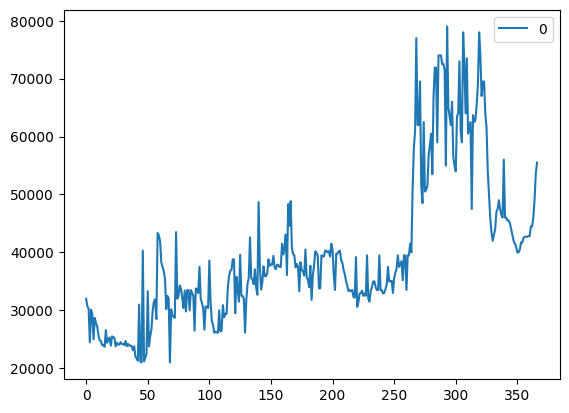

In [15]:
pd.DataFrame(X).plot()

In [16]:
X.shape

(367,)

In [17]:
X

array([32000., 30700., 30300., 24500., 30100., 29400., 25000., 28700.,
       27800., 27200., 25700., 24800., 24700., 24000., 24000., 23700.,
       26600., 24400., 25000., 25300., 23900., 25500., 25400., 25200.,
       23800., 24400., 24100., 24100., 24500., 24200., 24200., 24000.,
       24700., 23800., 24200., 23900., 23950., 23750., 23100., 23800.,
       22000., 21700., 21300., 31000., 21200., 21000., 40300., 21200.,
       21800., 22450., 33300., 23800., 25500., 26700., 29900., 31500.,
       31900., 28500., 43350., 42950., 42000., 38300., 37500., 36800.,
       35400., 30200., 32500., 32000., 21000., 30200., 29200., 28850.,
       28700., 43500., 32000., 32500., 34300., 33700., 32200., 30400.,
       33400., 29800., 33500., 33500., 30000., 33500., 33000., 32500.,
       26500., 33750., 33750., 33000., 37500., 32000., 31300., 30300.,
       26650., 30700., 30600., 30400., 38600., 31500., 28200., 27500.,
       26150., 26300., 26200., 26150., 30000., 26350., 26550., 30900.,
      

In [18]:
y.shape

(367, 38)

In [19]:

# X = X[y.index]  # Пересинхронизируем индексы

X_train, X_holdout, y_train, y_holdout = train_test_split(
    y, X, test_size=0.2, shuffle=False, random_state=42
)

In [196]:
# from catboost import CatBoostRegressor
# model0 = CatBoostRegressor(iterations=10000, depth = 7, loss_function='MAE' , learning_rate = 0.03,  eval_metric="MAE",
# early_stopping_rounds = 100 , random_state=42)
# # ---------------------
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error

# model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
# model.fit(X_train, y_train)

# # Предсказание
# y_pred = model.predict(X_test)

# # Оценка модели
# mse = mean_squared_error(y_test, y_pred)
# print(f'MSE: {mse}')

In [ ]:
# df_train = df['Price'].iloc[:-28]
# df_test = df['Price'].iloc[-28:]

In [453]:

# model = AutoReg(df_train, lags=[i for i in range(40,200,15)]).fit()
# # best_score = [-1000, -1]
# # for i in range(1, 149):
# #     model = AutoReg(df_train, lags=i).fit()
# #     forecasts = model.forecast(50).tolist()
# #     if r2_score(forecasts, df_test) > best_score[0]:
# #         best_score = [r2_score(forecasts, df_test), i]
# # print(best_score)
# y = model.forecast(28).tolist()
# print('R2 score:', r2_score(y, df_test))
# print('MSE score:', mean_squared_error(y, df_test))
# print('MAE score:', mean_absolute_error(y, df_test))


# plt.figure(figsize=(14, 6))
# plt.plot(df_test.reset_index(drop=True), label='Фактические значения')
# plt.plot(y, label='Предсказанные значения')
# plt.title('Сравнение фактических и предсказанных значений')
# plt.xlabel('Индекс')
# plt.ylabel('Значения')
# plt.legend()
# plt.show()

In [25]:
# Обучение модели на X_train и y_train
model = AutoReg(y_train, lags=[i for i in range(1, 20, 5)], exog=X_train).fit()
model1 = ARIMA(y_train, order=(5, 1, 2), exog=X_train).fit()

c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib

In [24]:
var_model = VAR(df.drop(columns='Date'))

In [ ]:
# Прогнозирование на тестовой выборке
y_pred = model.forecast(steps=len(X_holdout), exog=X_holdout).tolist()
y_pred1 = model1.forecast(steps=len(X_holdout), exog=X_holdout).tolist()

c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\egorb\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the n

In [31]:
var_results = var_model.fit(maxlags=5)
y_pred2 = var_results.forecast(df.drop(columns='Date').values[-var_results.k_ar:], steps=len(y_holdout))

In [ ]:
# Оценка качества модели AutoReg
print('R2 score:', r2_score(y_holdout, y_pred))
print('MSE score:', mean_squared_error(y_holdout, y_pred))
print('MAE score:', mean_absolute_error(y_holdout, y_pred))

# Оценка качества модели ARIMA
print('R2 score:', r2_score(y_holdout, y_pred1))
print('MSE score:', mean_squared_error(y_holdout, y_pred1))
print('MAE score:', mean_absolute_error(y_holdout, y_pred1))

# Оценка качества модели VAR
var_results.summary()

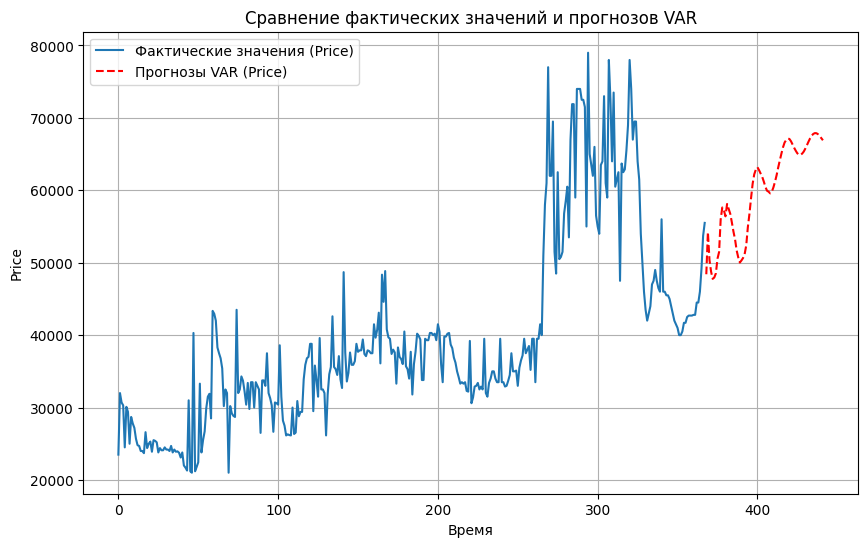

In [32]:
forecast_df = pd.DataFrame(y_pred2, columns=df.drop(columns='Date').columns)
# Фактические значения целевой переменной
actual_prices = df['Price']  # Замените 'target' на имя вашей целевой переменной

# Прогнозы для целевой переменной
forecast_prices = forecast_df['Price']  # Замените 'target' на имя вашей целевой переменной

# Создаём временной индекс для прогнозов
forecast_index = pd.RangeIndex(start=len(actual_prices), stop=len(actual_prices) + len(y_holdout), step=1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Фактические значения (Price)')
plt.plot(forecast_index, forecast_prices, label='Прогнозы VAR (Price)', linestyle='--', color='red')
plt.title('Сравнение фактических значений и прогнозов VAR')
plt.xlabel('Время')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [54]:
y_holdout

array([79000., 65000., 63500., 62000., 66000., 56500., 55000., 54000.,
       63500., 64000., 73000., 61000., 59000., 78000., 72500., 64000.,
       73500., 60500., 61500., 62500., 47500., 63700., 62500., 62900.,
       65500., 69000., 78000., 74000., 67000., 69500., 69500., 64000.,
       61500., 54000., 50000., 46000., 43500., 42000., 43000., 44000.,
       47000., 47500., 49000., 47500., 46500., 46000., 56000., 46000.,
       46000., 45500., 45500., 45000., 44000., 43000., 42000., 41500.,
       41000., 40000., 40000., 40500., 41700., 41700., 42500., 42700.,
       42700., 42700., 42800., 42800., 44500., 44500., 46000., 49200.,
       53700., 55500.])

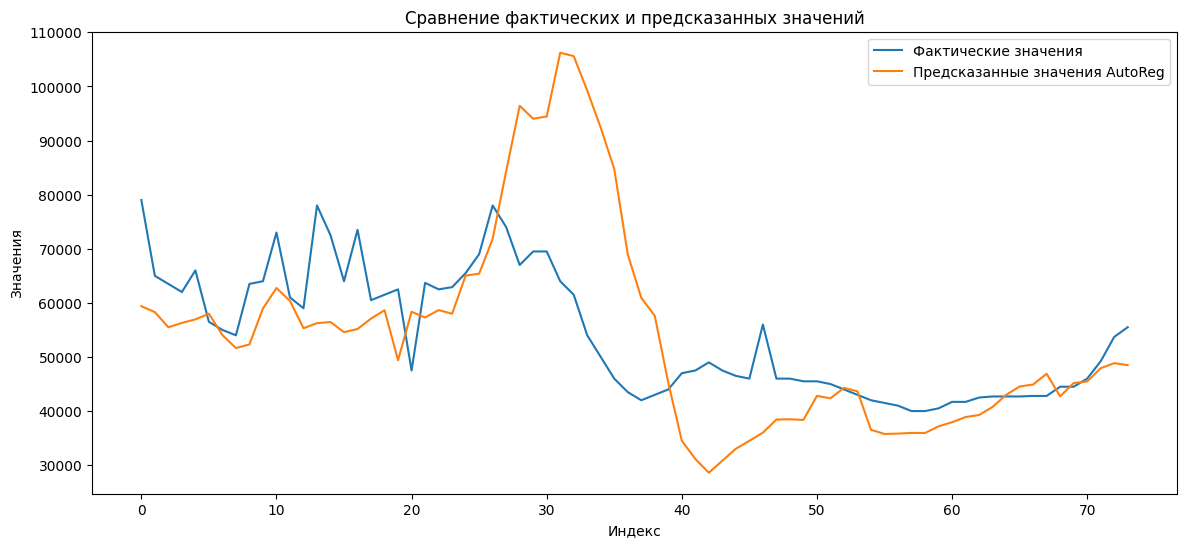

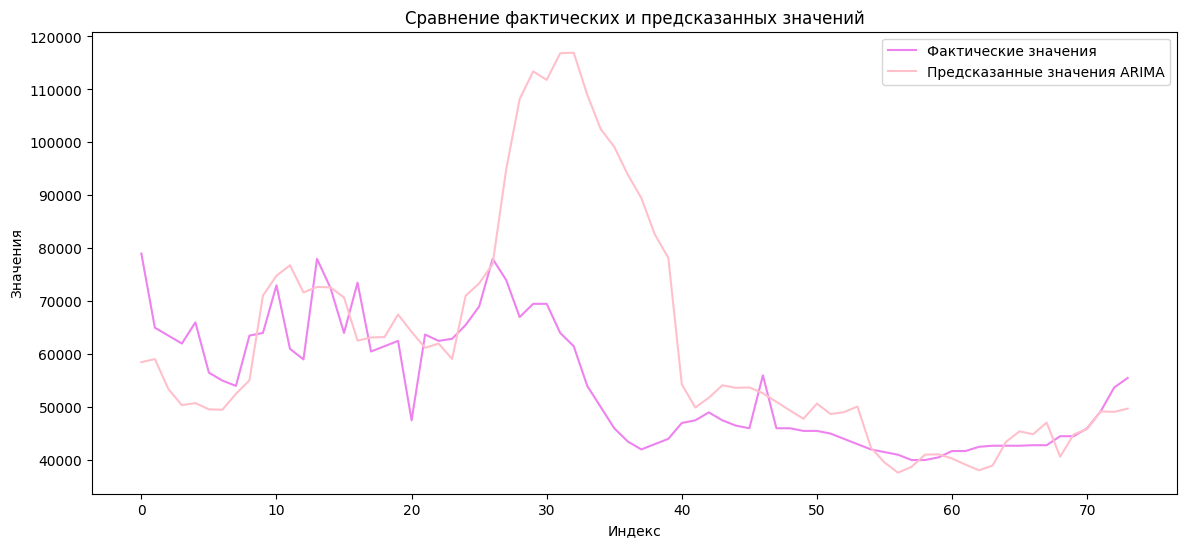

In [57]:
# Визуализация результатов
plt.figure(figsize=(14, 6))
plt.plot(y_holdout, label='Фактические значения')
plt.plot(y_pred, label='Предсказанные значения AutoReg')
# plt.plot(y_pred1, label='Предсказанные значения ARIMA')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.legend()
plt.show()

# Визуализация результатов
plt.figure(figsize=(14, 6))
plt.plot(y_holdout, label='Фактические значения', color='violet')
# plt.plot(y_pred, label='Предсказанные значения AutoReg')
plt.plot(y_pred1, label='Предсказанные значения ARIMA', color='pink')
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Индекс')
plt.ylabel('Значения')
plt.legend()
plt.show()

Было (до того как [я все перелопатил](https://github.com/Rainfue)):

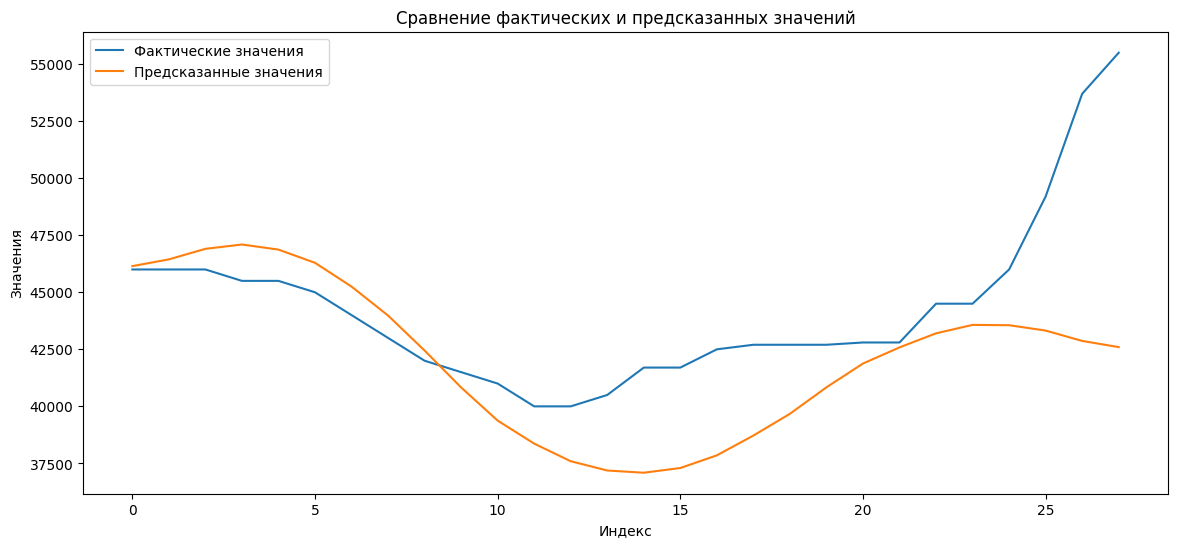

In [60]:
import joblib
joblib.dump(var_model, 'model.joblib')

import pickle
with open('model.pkl', 'wb') as f: pickle.dump(var_model, f)